In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# <font face="Courier New" color='green'>Solution to 2D Heat Equation in BioSticker</font>

## <font face="Courier New" color='black'>Heat Equation in 2D Cartesian Coordinate System</font>

<font size=4px> $\displaystyle \frac{\partial u}{\partial t} = c \bigg( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \bigg)$ <font>

<font size=3.5px> where: <br>
&nbsp;  &nbsp;  $u$ is temperature, $^\circ$C <br>
&nbsp;  &nbsp;  $t$ is time, $seconds$<br> 
&nbsp;  &nbsp;  $c$ is thermal diffusivity, $mm^2/s$ <br>
&nbsp;  &nbsp;  $x$ is linear dimension in $x-axis$, $mm$ <br>
&nbsp;  &nbsp;  $y$ is linear dimension in $y-axis$, $mm$ <br><font>

<font size=3.5px> Initial Condition: <br>
&nbsp;  &nbsp;  $u(x,y,t=0) = 25^\circ C$ <br>
<br> <font>
<font size=3.5px> Boundary Conditions: <br>
&nbsp;  &nbsp;  $u(x,y=0 \ mm,t) = 36.5^\circ C$ &nbsp;  &nbsp; Skin Temperature<br>
&nbsp;  &nbsp;  $u(x=0 \ mm,y,t) = 25^\circ C$ &nbsp;  &nbsp; Ambient Temperature<br>
&nbsp;  &nbsp;  $u(x,y= 10 \ mm,t) = 25^\circ C$ &nbsp;  &nbsp; Ambient Temperature<br>
&nbsp;  &nbsp;  $u(x=40 \ mm,y,t) = 25^\circ C$ &nbsp;  &nbsp; Ambient Temperature<br>
<br> <font>

<font size=3.5px> To obtain the Temperature distribution (estimate) inside the BioSticker, we will solve the heat equation (PDE) using Finite Difference Method. <font>

<font size=3.5px> We will solve the PDE using Forward time centered space Finite Difference. That is: <font>

<font size=4px> $\displaystyle \frac{\partial u}{\partial t} = \frac{u^{n+1}_{i,j}-u^n_{i,j}}{\Delta t}$ <font> <br>
<br>
<font size=4px> $\displaystyle \frac{\partial^2 u}{\partial x^2} = \frac{u^n_{i-1,j}-2u^n_{i,j}+u^n_{i+1,j}}{\Delta x^2}$ <font> <br>
<br>
<font size=4px> $\displaystyle \frac{\partial^2 u}{\partial y^2} = \frac{u^n_{i,j-1}-2u^n_{i,j}+u^n_{i,j-1}}{\Delta y^2}$ <font> <br>
<br>
    
<font size=4px> we will use discretization along $x$ is equal to discretization along $y$. i.e. $\Delta x = \Delta y$ <br>

<font size=4px> Our Finite Difference will be <font> <br>
<br>
<font size=4px> $\displaystyle u^{n+1}_{i,j} = u^n_{i,j} + \frac{c\Delta t}{\Delta x^2} \bigg[ u^n_{i-1,j}-4u^n_{i,j} + u^n_{i+1,j} + u^n_{i,j-1}+u^n_{i,j+1}\bigg]$ <font> <br>
<br>

In [2]:
u = np.ones([21,81])*25
dt = 0.001
dx = 0.5
xx = np.arange(0,41,dx)
yy = np.arange(0,11,dx)

fig, axes = plt.subplots(2,1, figsize = (6.5,5.5),dpi=150)
ax = axes.flatten()
cs0 = ax[0].contourf(u)
ax[0].set_aspect("equal")
ax[0].set_xticks(np.arange(0,81,10))
ax[0].set_yticks(np.arange(0,21,5))
ax[0].set_xticklabels(np.round(xx[::10],2))
ax[0].set_yticklabels(np.round(yy[::5],2))
ax[0].set_xlabel("base [mm]")
ax[0].set_ylabel("height [mm]")
ax[0].set_title("Initial Condition all $u = 25 ^\circ C$")
fig.colorbar(cs0, ax=ax[0])
m = 21        
n = 81
u[0,:] = 36.5
u[m-1,:] = 25
u[:,0] = 25
u[:,n-1] = 25

cs1 = ax[1].contourf(u)
ax[1].set_aspect("equal")
ax[1].set_xticks(np.arange(0,81,10))
ax[1].set_yticks(np.arange(0,21,5))
ax[1].set_xticklabels(np.round(xx[::10],2))
ax[1].set_yticklabels(np.round(yy[::5],2))
ax[1].set_xlabel("base [mm]")
ax[1].set_ylabel("height [mm]")
ax[1].set_title("Boundary Condition \n Left $u = 25 ^\circ C$, Right $u = 25 ^\circ C$ \n Top $u = 25 ^\circ C$, Bottom $u = 36.5 ^\circ C$")
fig.colorbar(cs1, ax=ax[1])
plt.show()

# <font face="Courier New" color='green'>Propagation of Temperature inside the BioSticker along $x,y,t$</font>

0.0
0.01
0.02
0.04
0.08
0.1
0.2
0.4
0.8
1.0
2.0
4.0
8.0
16.0
32.0
64.0
128.0


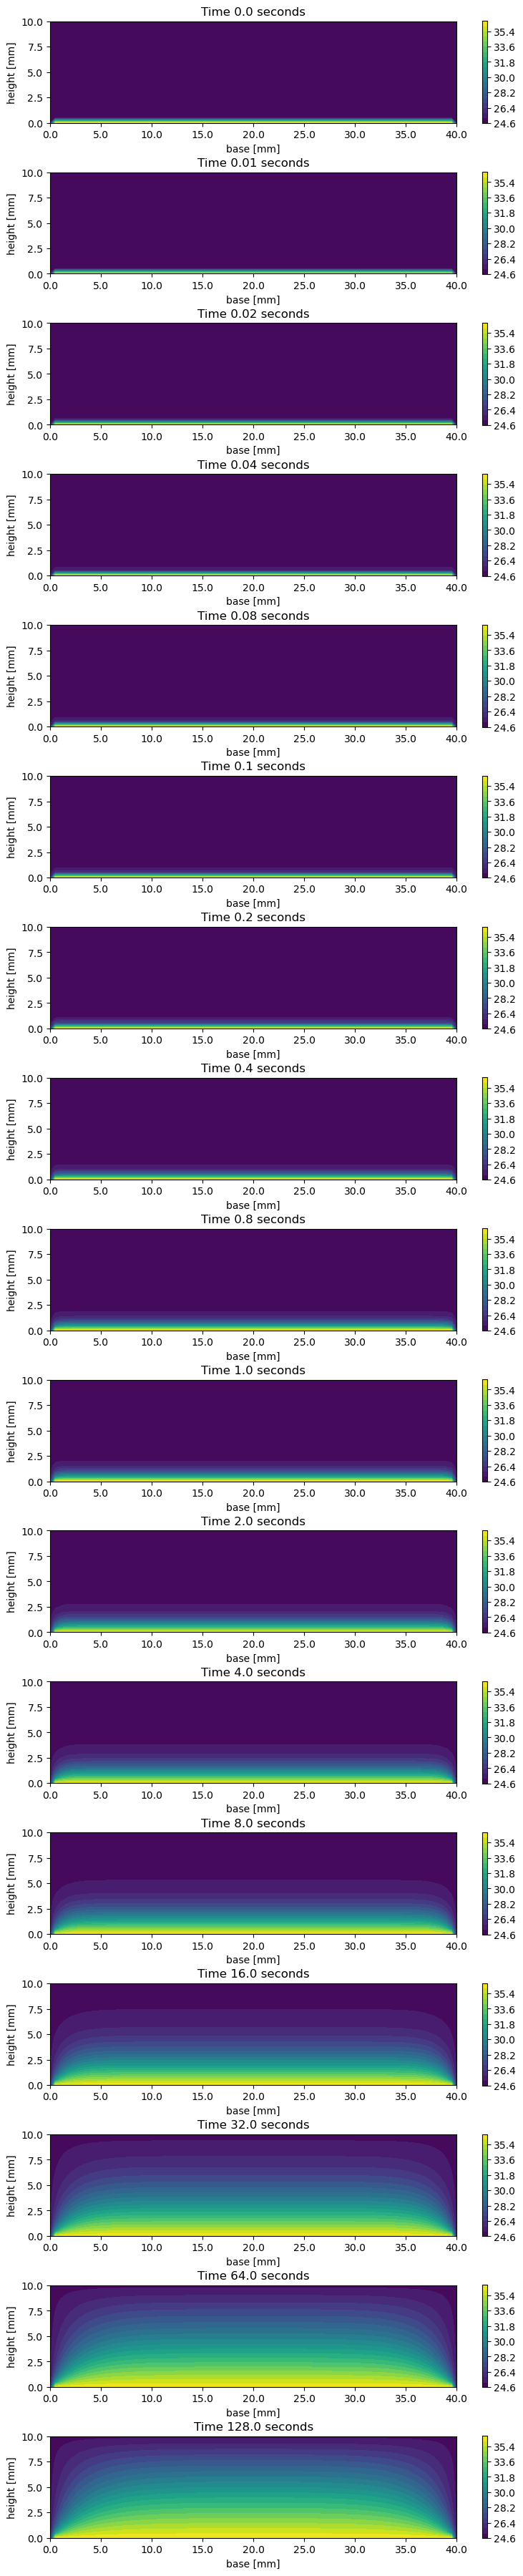

In [5]:
M = 128001 #64001
c = 0.3 # mm^2 per sec # 0.08 to 0.1440 mm^2/sec are the Thermal Diffusivity of some plastic material
u = np.ones([21,81])*25
uu = np.ones([21,81])*25
dt = 0.001 # second
dx = 0.5 # mm

fig, axes = plt.subplots(17,1,figsize=(8,36),dpi=100)
ax = axes.flatten()
p=0
for t in range(M):
    for i in range(1,20):
        for j in range(1,80):
            uu[i,j] = u[i,j] + (dt/(dx**2))*c*(u[i-1,j]+u[i+1,j]+u[i,j-1]+u[i,j+1]-4*u[i,j])
    m = 21        
    n = 81
    uu[0,:] = 36.5
    uu[m-1,:] = 25
    uu[:,0] = 25
    uu[:,n-1] = 25
    u=uu
    
    if t*dt in [0, 0.01, 0.02, 0.04, 0.08 ,0.1, 0.2, 0.4, 0.8, 1,2, 4, 8, 16, 32, 64,128]:
        cs = ax[p].contourf(uu, levels = 20)
        ax[p].set_aspect("equal")
        ax[p].set_title("Time {} seconds".format(t*dt))
        ax[p].set_xticks(np.arange(0,81,10))
        ax[p].set_yticks(np.arange(0,21,5))
        ax[p].set_xticklabels(np.round(xx[::10],2))
        ax[p].set_yticklabels(np.round(yy[::5],2))
        ax[p].set_xlabel("base [mm]")
        ax[p].set_ylabel("height [mm]")
        fig.colorbar(cs, ax=ax[p])
        p=p+1
        print(t*dt)
    t=t
plt.tight_layout()
plt.show()

In [6]:
c*dt/(dx**2) <= 0.25 #Finite Difference Stability Test

True

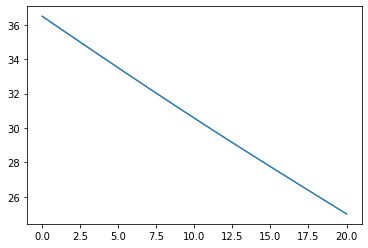

In [16]:
plt.plot(uu[:,40])
plt.show()